In [34]:
# Import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Read csv file
df = pd.read_csv('data.csv', index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [36]:
# Target and feature variables
y = df['TARGET CLASS']
X = df.drop('TARGET CLASS', axis=1)

In [37]:
# Feature preprocessing

# this being raw classified data, we shall standardize features so that we can measure the closest neighbors on the same scale
from sklearn.preprocessing import StandardScaler as SS
scaler = SS()
scaler.fit(X)

StandardScaler()

In [38]:
# Transform data
col = X.columns
X = pd.DataFrame(scaler.transform(X), columns=col)
X.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [39]:
# Train test data
from sklearn.model_selection import train_test_split as tts
tX, vX, ty, vy = tts(X, y, train_size=0.7, test_size=0.3, random_state=0)

In [40]:
# KNN model

# let's take k=1 as we are checking if one will take TARGET CLASS or not.
from sklearn.neighbors import KNeighborsClassifier as KNC
model = KNC(n_neighbors=1)
model.fit(tX, ty)
pred = model.predict(vX)

In [41]:
# Evatuate model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(vy, pred))

[[125  15]
 [ 16 144]]


In [42]:
print(classification_report(vy, pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       140
           1       0.91      0.90      0.90       160

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [48]:
# choosing best k value
error = []

for i in range(1,50):
    model = KNC(n_neighbors=i)
    model.fit(tX, ty)
    pred = model.predict(vX)
    no_of_incorrect_pred = (pred == vy).value_counts()[1]
    error.append(no_of_incorrect_pred)

Text(0, 0.5, 'Error count')

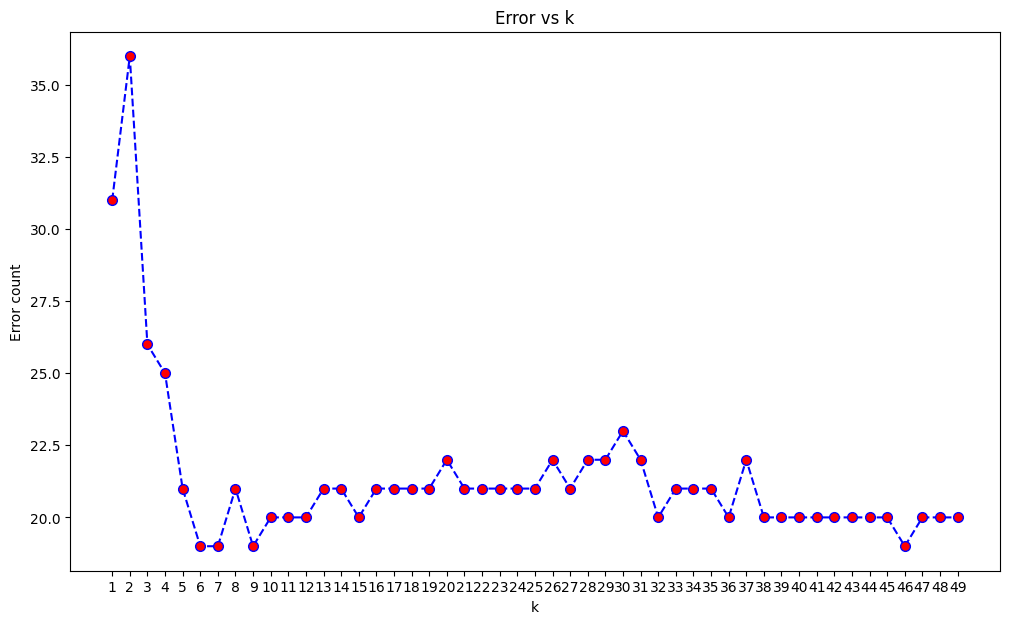

In [53]:
# plot error vs k value
plt.figure(figsize=(12,7))
plt.plot(range(1,50), error, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=7)
plt.title('Error vs k')
plt.xticks(np.arange(1,50))
plt.xlabel('k')
plt.ylabel('Error count')

In [58]:
# k values with least error are [6,7,9,46]

# choosing 46 will have overfitting and best case is 9
better_model = KNC(n_neighbors=9)
better_model.fit(tX, ty)
pred = better_model.predict(vX)

# evaluate
print(confusion_matrix(vy, pred))

[[130  10]
 [  9 151]]


In [59]:
print(classification_report(vy, pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       140
           1       0.94      0.94      0.94       160

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

